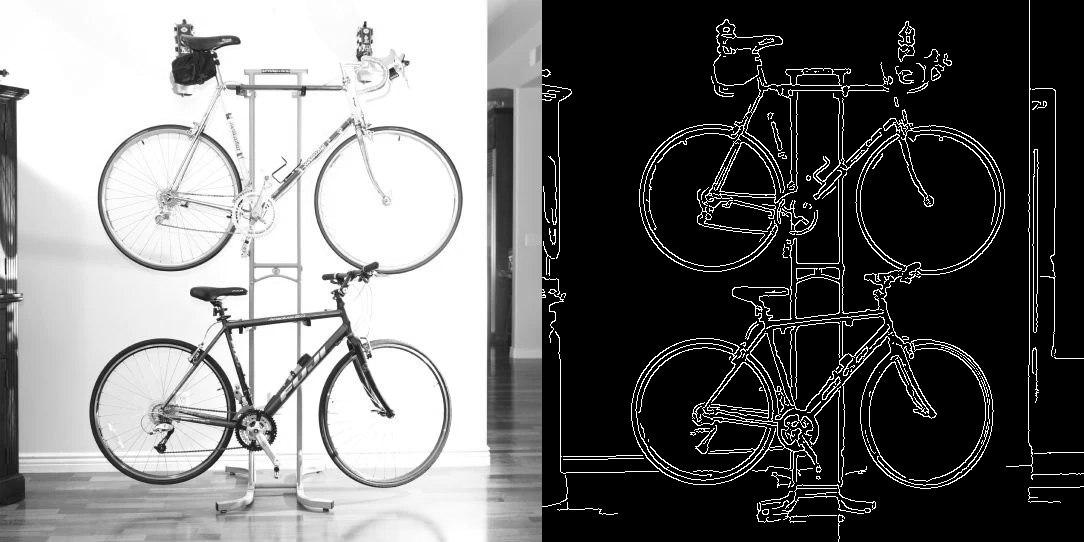

In [5]:
#@title Question 1: Part 1

import cv2
import numpy as np
from IPython.display import display
from PIL import Image

# Load the image
image = cv2.imread('/content/DBR-825-05D_6716-6x6-copy-542x542__06092.1552571608.1280.1280.webp')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Edge detection using Canny
edges = cv2.Canny(blurred, 50, 150)

# Convert the edges to a color image
edges_color = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

# Combine the original image and the edges
combined = np.hstack((cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR), edges_color))

# Convert the combined image to RGB (for display purposes)
combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)

# Convert the OpenCV image to PIL format
pil_image = Image.fromarray(combined_rgb)

# Display the image using IPython.display
display(pil_image)


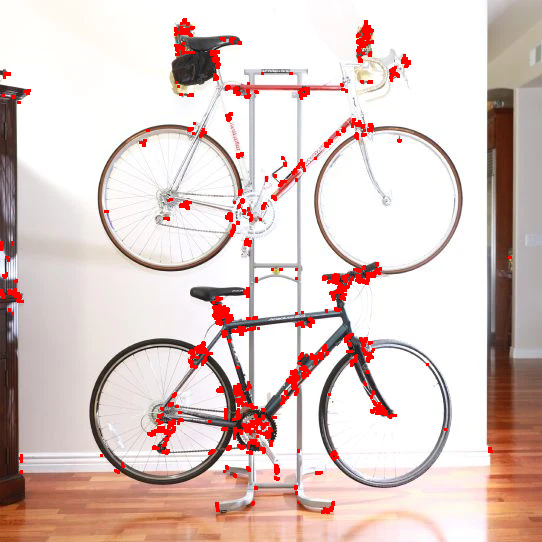

In [6]:
#@title Question 1: Part 2

import cv2
import numpy as np
from IPython.display import display
from PIL import Image

# Load the image
image = cv2.imread('/content/DBR-825-05D_6716-6x6-copy-542x542__06092.1552571608.1280.1280.webp')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Corner detection using Harris
corners = cv2.cornerHarris(blurred, 2, 3, 0.04)
# Dilate the corners to make them more visible
corners = cv2.dilate(corners, None)

# Threshold for an optimal value, it may vary depending on the image
image[corners > 0.01 * corners.max()] = [0, 0, 255]

# Convert the image to RGB (for display purposes)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the OpenCV image to PIL format
pil_image = Image.fromarray(image_rgb)

# Display the image using IPython.display
display(pil_image)


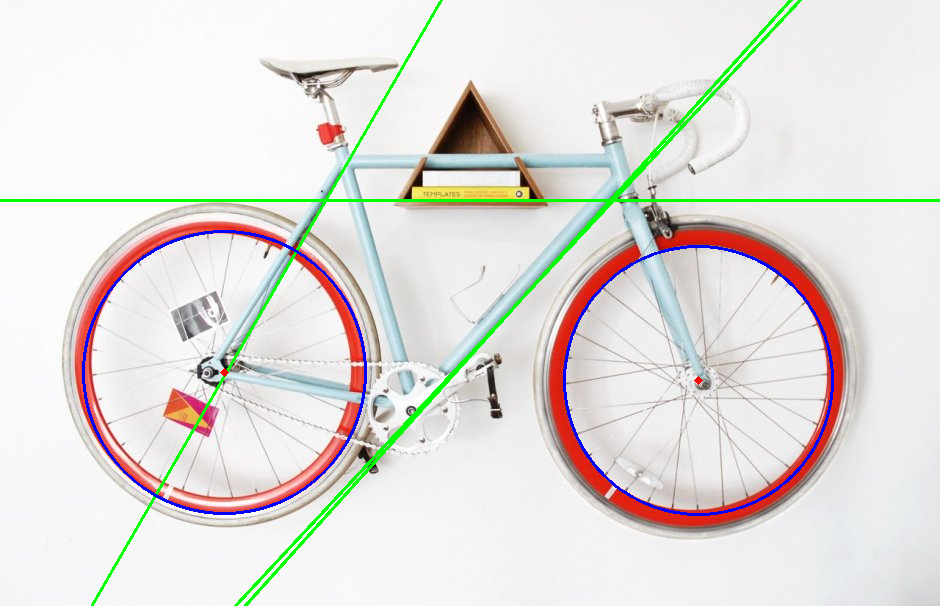

In [17]:
import cv2
import numpy as np
from IPython.display import display
from PIL import Image

# Load the image
image = cv2.imread('/content/Bcycle on the wall.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Edge detection using Canny
edges = cv2.Canny(blurred, 500, 150)

# Line detection using Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Circle detection using Hough Transform
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=400, param2=60, minRadius=0, maxRadius=0)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(image, (i[0], i[1]), i[2], (255, 0, 0), 2)
        # Draw the center of the circle
        cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)

# Convert the image to RGB (for display purposes)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the OpenCV image to PIL format
pil_image = Image.fromarray(image_rgb)

# Display the image using IPython.display
display(pil_image)


In [12]:
!pip install scikit-image matplotlib ipywidgets
!pip install ipympl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 6.2 MB/s eta 0:00:00


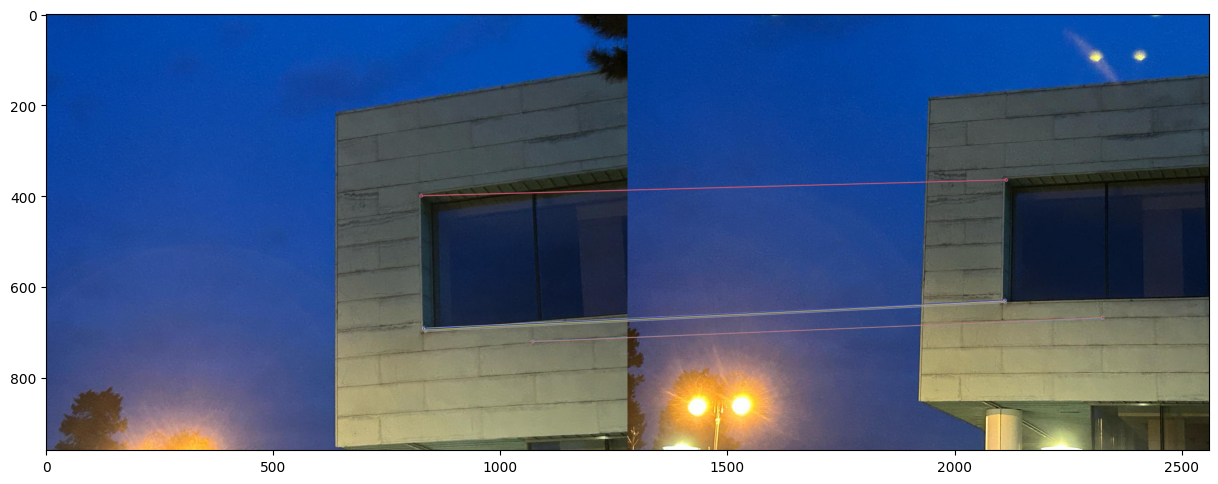

In [7]:
#@title Part 3
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the two images
image1 = cv2.imread('/content/15.jpeg')
image2 = cv2.imread('/content/16.jpeg')

# Initialize ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort them in the order of their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 10 matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=2)

# Convert BGR to RGB for matplotlib
matched_image = cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(15, 7))
plt.imshow(matched_image)
plt.show()


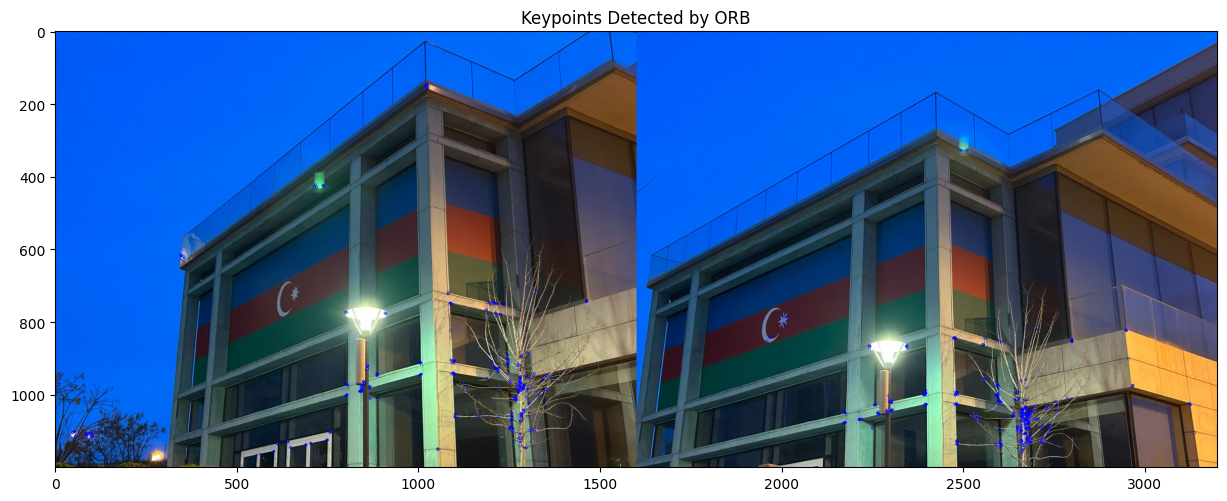

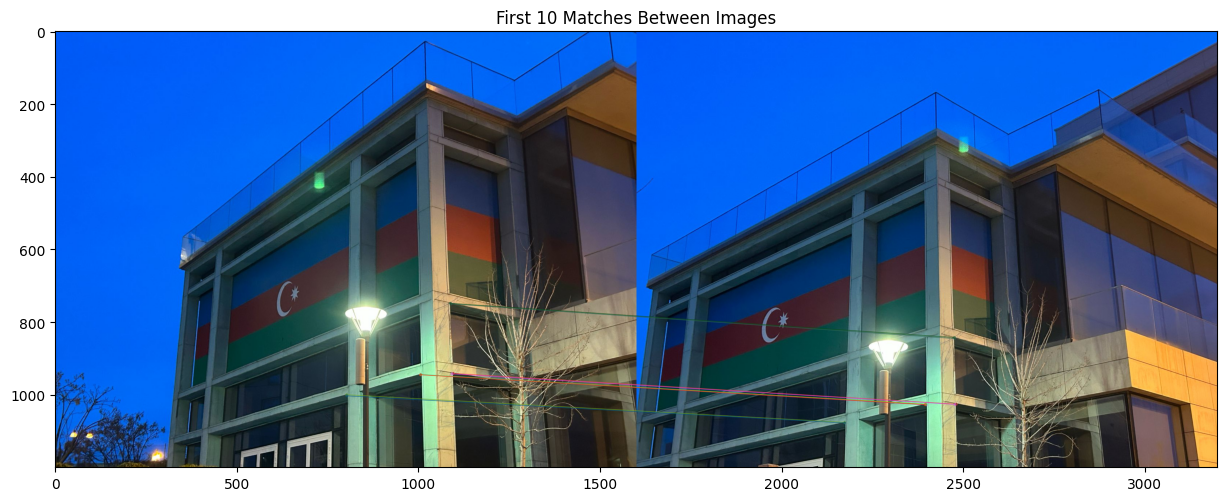

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the two images
image1 = cv2.imread('/content/1.jpeg')
image2 = cv2.imread('/content/2.jpeg')

# Initialize ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort them in the order of their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 10 matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], outImg=None, flags=2)

# Draw keypoints on the images
keypoint_image1 = cv2.drawKeypoints(image1, keypoints1, None, color=(255, 0, 0), flags=0)
keypoint_image2 = cv2.drawKeypoints(image2, keypoints2, None, color=(255, 0, 0), flags=0)

# Combine images horizontally
combined_image = np.hstack((keypoint_image1, keypoint_image2))

# Convert BGR to RGB for matplotlib
combined_image_rgb = cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB)

# Display the keypoints
plt.figure(figsize=(15, 7))
plt.imshow(combined_image_rgb)
plt.title('Keypoints Detected by ORB')
plt.show()

# Display the matched points
plt.figure(figsize=(15, 7))
matched_image_rgb = cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB)
plt.imshow(matched_image_rgb)
plt.title('First 10 Matches Between Images')
plt.show()
